### The convection diffusion equation

In [10]:
import numpy as np
import pylab as pl
import triflow as trf
from scipy.signal import gaussian

%matplotlib inline

The convection–diffusion equation is a combination of the diffusion and convection (advection) equations, and describes physical phenomena where particles, energy, or other physical quantities are transferred inside a physical system due to two processes: diffusion and convection. ([Wikipedia](https://en.wikipedia.org/wiki/Convection%E2%80%93diffusion_equation))

The equation reads

$$\partial_{t}U = k \partial_{xx} U - c \partial_{x} U$$

with

- $U$ the physical quantities transferred (it could be a chemical species concentration, the temperature of a fluid...)
- $k$ a diffusion convection
- $c$ a velocity, which will be constant in our example.


In [11]:
model = trf.Model("k * dxxU - c * dxU", "U", ["k", "c"])

We discretize our spatial domain. We want periodic condition,
so `endpoint=True` exclude the final node (which will be redondant with the
first node, $x=0$ and $x=100$ are merged)

In [12]:
x = np.linspace(0, 100, 500, endpoint=False)

We initialize with three gaussian pulses for the initial condition

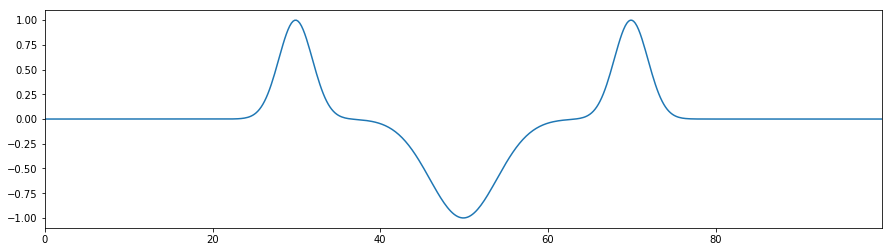

In [13]:
U = (np.roll(gaussian(x.size, 10), x.size // 5) +
     np.roll(gaussian(x.size, 10), -x.size // 5) -
     gaussian(x.size, 20))

fields = model.fields_template(x=x, U=U)

pl.figure(figsize=(15, 4))
pl.plot(fields.x, fields.U)
pl.xlim(0, fields.x.max())
pl.show()

We precise our parameters. The default scheme provide an automatic time_stepping. We set the periodic flag to True.

In [14]:
parameters = dict(k=.2, c=10, periodic=True)

We initialize the simulation.

In [15]:
%%opts Curve [show_grid=True, width=800] {-framewise}
simulation = trf.Simulation(model, fields, parameters, dt=.1, tmax=30)
container = simulation.attach_container()
trf.display_fields(simulation)

We iterate on the simulation until the end.

In [16]:
import warnings
warnings.filterwarnings('ignore')

result = simulation.run()

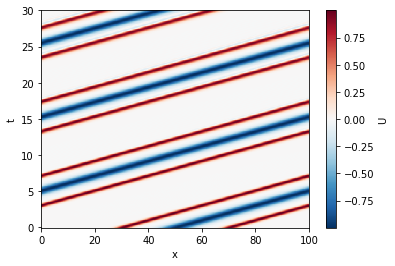

In [9]:
container.data.U.plot()